In [1]:
import sys, os
if 'google.colab' in sys.modules and not os.path.exists('.setup_complete'):
    !wget -q https://raw.githubusercontent.com/yandexdataschool/Practical_RL/master/setup_colab.sh -O- | bash
    !touch .setup_complete

# This code creates a virtual display to draw game images on.
# It will have no effect if your machine has a monitor.
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

#!pip install gymnasium[all]

/bin/bash: ../xvfb: No such file or directory


# Policy iteration

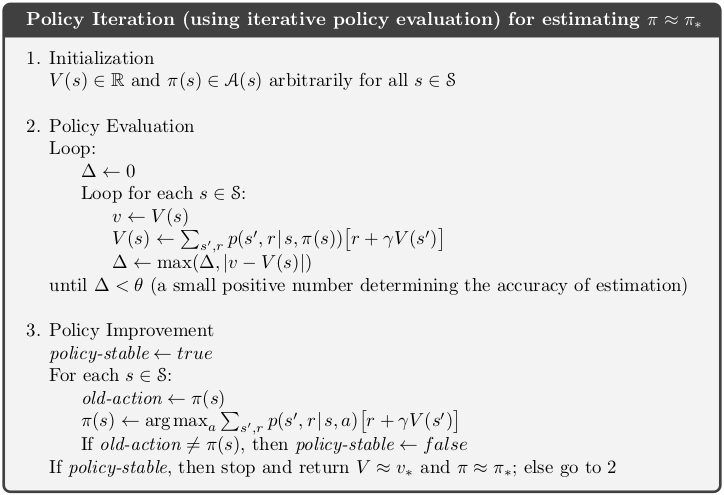

In [38]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def policy_iteration(env, gamma, theta, max_iter=10000):
    # Initialize policy
    V = np.zeros(env.observation_space.n)
    pi = np.zeros(env.observation_space.n, dtype=int)
    policy_stable = False
    iterations = 0

    while not policy_stable:
        iterations += 1
        # 2 policy evaluation
        for i in range(max_iter):
            delta = 0
            for s in range(env.observation_space.n):
                v = V[s]
                V[s] = sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][pi[s]]])
                delta = max(delta, abs(v - V[s]))
            if delta < theta:
                break

        # 3 policy improvement
        policy_stable = True
        for s in range(env.observation_space.n):
            old_action = pi[s]
            pi[s] = np.argmax([sum([p * (r + gamma * V[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.action_space.n)])
            if old_action != pi[s]:
                policy_stable = False
        
    return V, pi, iterations


In [53]:
def run_episodes(env, policy, num_games=100):
    '''
    Run some games to test a policy
    '''
    tot_rew = 0
    state = env.reset()

    for _ in range(num_games):
        done = False
        while not done:
            if type(state) == tuple:
                state = state[0]
            next_state, reward, done, truncated, info = env.step(policy[state])
                
            state = next_state
            tot_rew += reward 
            if done:
                state = env.reset()

    print('Won %i of %i games!'%(tot_rew, num_games))

In [54]:
#for gymnasium we declare rendermode in env creation rather than in env.render
#gym env make frozen lake
env = gym.make("FrozenLake-v1", render_mode="rgb_array")

V, pi, iterations = policy_iteration(env, gamma=0.9, theta=1e-6)

print('Converged after %i policy iterations'%(iterations))

run_episodes(env, pi)
print(V.reshape((4,4)))
print(pi.reshape((4,4)))

Converged after 6 policy iterations
Won 83 of 100 games!
[[0.06888651 0.06141136 0.07440774 0.055805  ]
 [0.09185115 0.         0.11220731 0.        ]
 [0.14543402 0.24749566 0.29961679 0.        ]
 [0.         0.37993506 0.63901975 0.        ]]
[[0 3 0 3]
 [0 0 0 0]
 [3 1 0 0]
 [0 2 1 0]]
